# Data sets
For the first part of the project you will work on a high-dimensional cancer data set (3000 genes) with relatively few observations (82). There are three types of cancer in the data set and the labels are provided in the first column on the data matrix (posted on Canvas).

For the second part of the project you will work on the other high-dimensional cancer data set (TCGA) from class. This data set has far more samples spread over 6 classes. Some of you will also revisit the cats and dogs data set from project 2.

# Question 1
Investigate at least 4 different clustering methods on the "CancerData.txt" data set.

Consider different dimension and feature selection techniques. Remember - it's a clustering task so you cannot select based on the class label!!!

Questions to focus on:

* Do the detected clusters overlap with the classes? Do some classes stand out?
* Do cluster selection methods (try at least 2) propose 3 clusters or more/fewer? 
* How sensitive are any of the results above to how many features or reduced dimensions you use? and does this depend on which clustering method you use? 
* How stable are the clustering results (investigate via resampling, consensus clustering etc)?

# Question 2
For the second task you will work on the TCGA data set which is high-dimensional but far richer in terms of the number of samples. The first themes all relate to a "complication". Your job is to investigate how these complications impact the clustering performance of the different methods. So try to say something about the overall impact on clustering in general and, if you see a varying impact on performance for different methods discuss this and try to reason as to why. The last theme is about clustering features and you will revisit the cats and dogs data set for this.

# Theme 2b - relative cluster size
The classes in the TCGA data set are already imbalanced. Use this data as a basis for a simulation study where you investigate the imbalance in cluster size (in terms of number of observations) on clustering and the selection of the number of clusters.

You can even out this data set or make it even more imbalanced by removing observations or adding pseudo-observations (by creating new observations by e.g. taking a linear combination of 2 observations within the same class weighted by e.g. 0.85, 0.15 say).

How do the clustering methods and cluster selection methods handle imbalanced cluster sizes? Think carefully about how to go about this simulation study so you don't confound cluster separation and cluster size too much. It's up to you which classes you choose to make small or large and what challenges you choose to focus on.

Useful links? 
* https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
* 

In [272]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
# There are three types of cancer in the data set and the labels are provided in the first column on the data matrix (posted on Canvas).

cancerData = pd.read_csv('./Cancerdata.txt', sep='\t')
# kNN_mat = pd.DataFrame(data=Ll_kNN, columns=runs)
columnIndexing = ['gene'+str(int(i)) for i in range(cancerData.shape[1])]

columnIndexing[0] = 'label'
print("Number of column names", len(columnIndexing))
print("Number of columns in the dataset", cancerData.shape[1])
print("Shape of dataset", np.shape(cancerData))
print("Example cell element", cancerData.loc[1][2])
cancerData.set_axis(columnIndexing, axis="columns", inplace=True)
print("Example row:")
print(cancerData.loc[1])
print("Example column:")
print(cancerData['gene1'])

Number of column names 3000
Number of columns in the dataset 3000
Shape of dataset (82, 3000)
Example cell element -0.509770195
Example row:
label       1.000000
gene1      -1.227567
gene2      -0.509770
gene3      -1.227567
gene4      -0.722172
              ...   
gene2995   -1.227567
gene2996    0.694120
gene2997    2.981591
gene2998    0.346862
gene2999    0.163492
Name: 1, Length: 3000, dtype: float64
Example column:
1    -1.227567
2    -1.120330
3    -1.330720
4    -1.510219
5     0.230166
        ...   
78   -1.150510
79   -0.584720
80   -1.424392
81    0.080706
82   -1.385728
Name: gene1, Length: 82, dtype: float64


C:\Users\Jesper\AppData\Local\Temp\ipykernel_10864\1212035839.py:17: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  cancerData.set_axis(columnIndexing, axis="columns", inplace=True)


In [273]:
cancerData.head()

,label,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,...,gene2990,gene2991,gene2992,gene2993,gene2994,gene2995,gene2996,gene2997,gene2998,gene2999
1,1,-1.227567,-0.509770,-1.227567,-0.722172,0.132458,2.295282,1.899027,1.877939,3.375826,...,2.387587,0.940752,-0.943628,-0.606625,-1.227567,-1.227567,0.694120,2.981591,0.346862,0.163492
2,0,-1.120330,-1.120330,-0.839468,-0.594322,-0.016176,-0.095270,-1.120330,0.016662,3.750095,...,2.321014,0.979683,-0.961493,-1.120330,-1.120330,-1.120330,-0.705967,2.008537,0.358654,0.737431
3,1,-1.330720,-1.235862,-1.330720,-0.853254,1.020889,1.111245,0.763962,1.544266,3.334633,...,2.055475,0.682382,-0.879855,-0.852728,-1.330720,-1.330720,0.690879,1.697196,0.506439,-0.390086
4,0,-1.510219,-1.052041,-1.510219,-0.695578,0.237352,-1.510219,-1.510219,-1.510219,2.732156,...,1.659447,1.153967,-0.701910,-0.383355,-1.510219,-1.510219,-0.499640,1.697227,1.325028,0.704106
5,2,0.230166,-0.095223,-0.990862,-0.990862,-0.186215,-0.990862,-0.990862,-0.990862,3.408664,...,2.316889,0.748838,-0.990862,-0.990862,-0.990862,-0.990862,0.261389,3.408664,-0.990862,-0.990862


Shape of raw data: (82, 3000)
Shape of dataset excluding labels (82, 2999)
Shape of labels (82,)
[60 23  9 27 57 43 58 31 77 76 40 37 48  0 34 51 33  7 24 20  5 66 35 42
 29 46 78 41 30 38 50 65  4 22 10 21 71 80 74 59  8 70 61 15 73 47  6 69
 79 28  1 54 44 18 39  3 67 19 13 52 12 32 56 55  2 36 11 62 25 14 53 72
 75 16 68 45 64 26 63 49 17]
Shape of PCA results (82, 3)
Explained variation per principal component: [0.12563841 0.09442987 0.07225259]
(81,)
(82,)
(82,)
(81,)
2     0
3     1
4     0
5     2
6     2
     ..
78    1
79    0
80    1
81    0
82    2
Name: label, Length: 81, dtype: int64
[t-SNE] Computing 81 nearest neighbors...
[t-SNE] Indexed 82 samples in 0.007s...
[t-SNE] Computed neighbors for 82 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 82 / 82
[t-SNE] Mean sigma: 20.680238
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.068962
[t-SNE] KL divergence after 300 iterations: 0.192700


<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

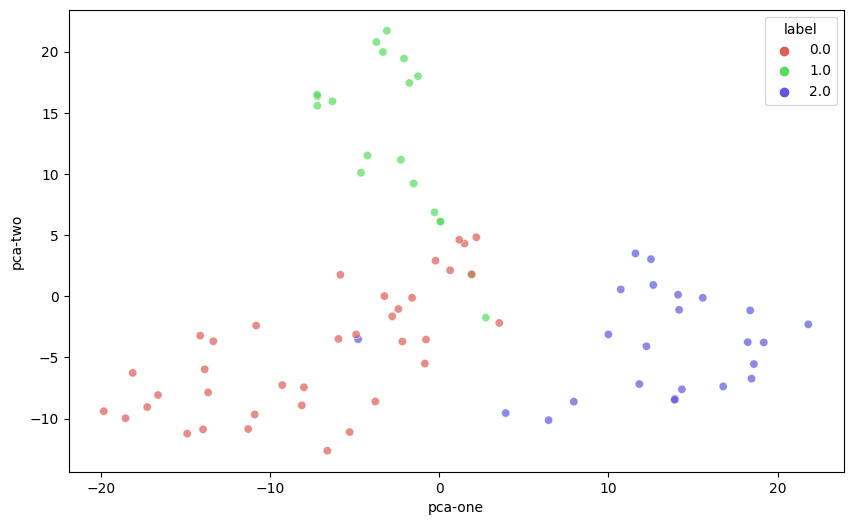

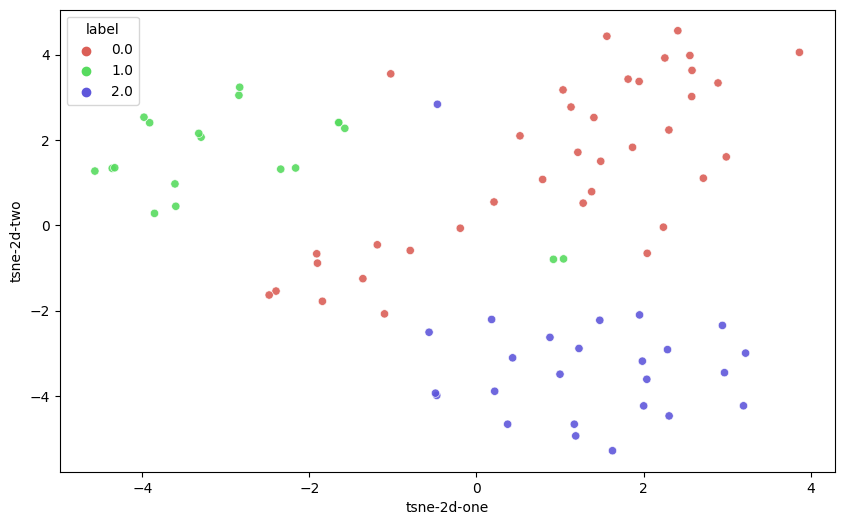

In [274]:
# t-SNE visualization of the cancerData
# Skeleton code mostly from this link https://builtin.com/data-science/tsne-python
# PCA pretreatment due to high num of variables
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import time

# PCA with plotting
N = 82

print("Shape of raw data:", cancerData.shape)

cancerDataSubset = pd.DataFrame(cancerData) # Data to be clustered

cancerLabels = cancerData.iloc[:,0] # Labels for the data
cancerDataSubset = cancerData.iloc[:,1:] # Remove the labels

print("Shape of dataset excluding labels", np.shape(cancerDataSubset))
print("Shape of labels", np.shape(cancerLabels))

rndperm = np.random.permutation(cancerDataSubset.shape[0]-1)
print(rndperm[:N])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(cancerDataSubset)
print("Shape of PCA results", np.shape(pca_result))

cancerDataSubset['pca-one'] = pca_result[:,0]
cancerDataSubset['pca-two'] = pca_result[:,1] 
cancerDataSubset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print(np.shape(pca_result[1:,1]))
print(np.shape(cancerLabels))
print(np.shape(cancerLabels.loc[1:82]))
print(np.shape(cancerLabels.iloc[1:]))

print(cancerLabels.iloc[1:])

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=cancerLabels.iloc[1:],
    palette=sns.color_palette("hls", 3),
    data=cancerDataSubset.iloc[rndperm],
    legend="full",
    alpha=0.7
)

# t-SNE plotting 
# Kan även använda PCA innan man applicerar t-SNE vilket kan vara relevant a kika på
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(cancerDataSubset)

cancerDataSubset['tsne-2d-one'] = tsne_results[:,0]
cancerDataSubset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=cancerLabels.iloc[1:],
    palette=sns.color_palette("hls", 3),
    data=cancerDataSubset,
    legend="full",
    alpha=0.9
)

### Question 1 ### 

Clustering Method 1) Density-based clustering

Shape of PCA subset (82, 3)
min_samples: 9
Max distance to 9th nearest neighbor (eps): 7.62
Labels of DBSCAN clustering on PCA subset:
[-1  0  2  0  1 -1  1 -1 -1 -1  2  1  0 -1 -1  1 -1  0  0  1  1  0  0 -1
 -1  1 -1 -1  1  0  0  0  0  0  2  0  0  0  0 -1 -1  0  0 -1 -1 -1  0  2
  1  1  2  2  1  0  1  1  1  0 -1  1  1  1  0  1 -1  0  2  0 -1 -1 -1  0
  1  0 -1 -1  1  2  0  2  0  1]
Contains noise: True
Number of clusters: 4
Colors for plotting: ['blue', 'red', 'green', 'grey']
labels [0, 1, 2]


C:\Users\Jesper\AppData\Local\Temp\ipykernel_10864\2980609512.py:66: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax2 = sns.scatterplot(


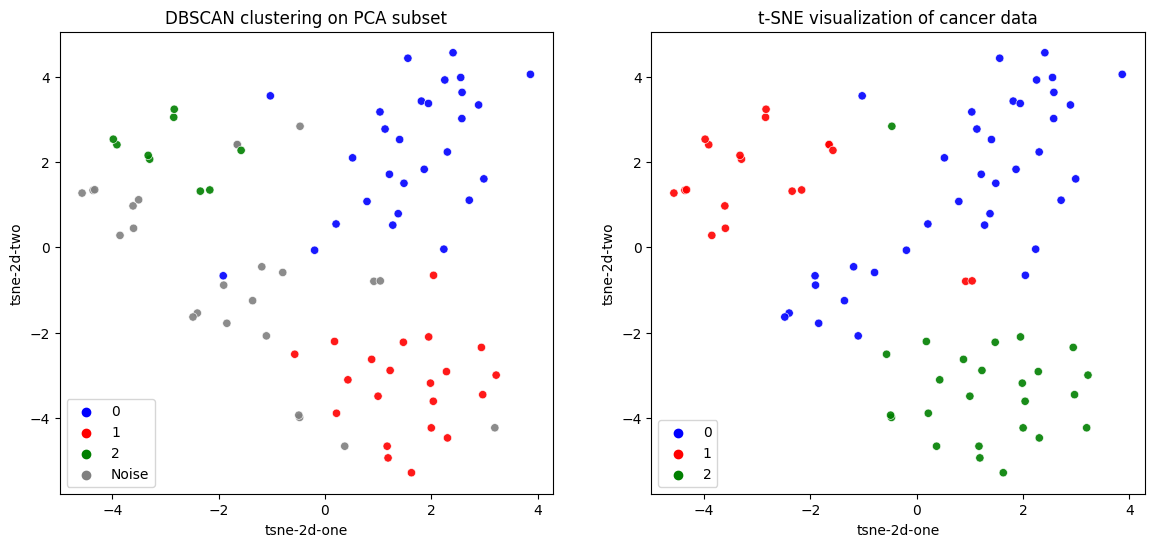

In [338]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import to_hex

pca_subset = pca_result[:,0:10]
print("Shape of PCA subset", np.shape(pca_subset))
min_samples = 3*pca_subset.shape[1] # SAVED
# min_samples = 2*pca_subset.shape[1]
print("min_samples:", min_samples)

neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(pca_subset)
neigh_dist, _ = neigh.kneighbors(n_neighbors=min_samples, return_distance=True)
eps = np.max(neigh_dist[:,-1])/2 # SAVED
# eps = np.max(neigh_dist[:,-1])/3

print(f"Max distance to {min_samples}th nearest neighbor (eps): {eps:.2f}")

DB_pca_cluster = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_subset)
clusters = DB_pca_cluster.labels_

print("Labels of DBSCAN clustering on PCA subset:")
print(clusters)
contains_noise = any(clusters==-1)
if contains_noise:
    clusters[clusters==-1] = 50 # Make outliers a separate cluster
# print("Labels of DBSCAN clustering on PCA subset")
# print(clusters)

print(f"Contains noise: {contains_noise}")

colors_all = ['blue', 'red', 'green', 'yellow', 'orange', 'purple',
          'pink', 'brown', 'black', 'magenta', 'cyan']

print("Number of clusters:", len(np.unique(clusters)))
colors = colors_all[:max(len(np.unique(clusters))-1, np.unique(cancerLabels).shape[0])] # Make sure we have enough colors
if contains_noise:
    colors.append('grey')  
print("Colors for plotting:", colors)

colors_hex = [to_hex(i) for i in colors]

fig = plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=clusters,
    palette=colors_hex,
    data=cancerDataSubset,
    legend="full",
    alpha=0.9
)
handles, _ = ax1.get_legend_handles_labels()

labels = [str(i) for i in np.unique(clusters)]
if contains_noise:
    labels[labels.index('50')] = 'Noise'
    
ax1.legend(handles, labels, loc='lower left')
labels = [str(i) for i in np.unique(clusters)]
plt.title("DBSCAN clustering on PCA subset")

plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=cancerLabels.iloc[1:],
    palette=colors_hex,
    data=cancerDataSubset,
    legend="full",
    alpha=0.9
)
handles, labels =  ax2.get_legend_handles_labels()
labels = [int(float(i)) for i in labels]
print("labels", labels)
ax2.legend(handles, labels, loc='lower left')
plt.title("t-SNE visualization of cancer data")

plt.show()

Try on t-SNE dimension reduction

## Question 2b ##

In [ ]:
data_train = pd.read_csv('data_train.csv', sep=',')
print(data_train.shape)
data_train.head()

(100, 4)


,Unnamed: 0,class,x1,x2
0,1,1,0.305515,3.070324
1,2,1,3.501000,1.109949
2,3,1,-1.420167,0.951287
3,4,1,-0.723193,0.845726
4,5,1,-0.767439,1.671577
